In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.io as sio

import fitting_functions

In [2]:
ms222_traces = ['091311a', '091311b', '091311c', '091311d', '091311e', '091311f', '091411a', '091411d', '091411e', '091411f']
ketamine_traces = ['63011d','70911i', '70911l', '70911m', '82411p', '82411r']

In [3]:
data_folder = '../data/anesthetized/'

# Power spectrum across all fish

We find that even across fish, and across hold times, there is a large peak in the power spectrum at ~30 Hz, and two smaller peaks at ~15 Hz and ~20 Hz.

In [4]:
fft_combined_short = np.zeros((16, 4151), dtype=np.complex)
fft_combined_long = np.zeros((16, 4151), dtype=np.complex)
# 4151 = length of time series from 0.225 ms to end

for i in range(len(ms222_traces)):
    trange, pe_short, pe_long = fitting_functions.importDataMS222(data_folder+'raw/MS-222/'+ms222_traces[i]+'.mat')
    fft_combined_short[i,:] = np.fft.fft(pe_short[1:])
    fft_combined_long[i,:] = np.fft.fft(pe_long[1:])
    
for i in range(len(ketamine_traces)):
    trange, pe_short, pe_long = fitting_functions.importDataKetamine(data_folder+'raw/Ketamine/'+ketamine_traces[i]+'.mat')
    fft_combined_short[6+i,:] = np.fft.fft(pe_short[1:])
    fft_combined_long[6+i,:] = np.fft.fft(pe_long[1:])
    
fft_freq = np.fft.fftfreq(len(trange[1:]), trange[2]-trange[1])

In [4]:
# Short/long separately
fft_gains_short = np.mean(np.abs(fft_combined_short)**2, axis=0)
fft_gains_long = np.mean(np.abs(fft_combined_long)**2, axis=0)

# Combined
fft_gains_combined = np.mean(np.abs(np.hstack((fft_combined_short, fft_combined_long)))**2, axis=0)

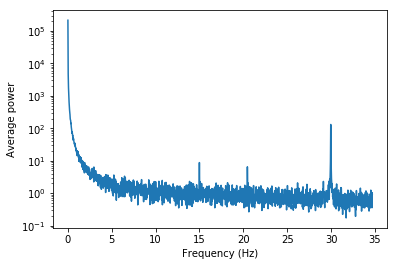

In [5]:
plt.yscale('log')
plt.plot(fft_freq[:len(fft_freq)//2], fft_gains_combined[:len(fft_freq)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Average power');

# Visualize FFT of single fish data

In [6]:
## Load data - MS-222

fish_ind = 2
trange, pe_short, pe_long = fitting_functions.importDataMS222(data_folder+'raw/MS-222/'+ms222_traces[fish_ind]+'.mat', fixed=False)

# Take FFT
short_fft = np.fft.fft(pe_short[1:])
long_fft = np.fft.fft(pe_long[1:])

fft_freq = np.fft.fftfreq(len(trange[1:]),trange[2]-trange[1])

### Short hold

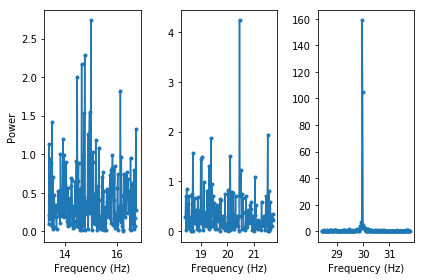

In [7]:
plt.subplot(1,3,1)
plt.plot(fft_freq[800:1000], np.abs(short_fft[800:1000])**2, '.-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

plt.subplot(1,3,2)
plt.plot(fft_freq[1100:1300], np.abs(short_fft[1100:1300])**2, '.-')
plt.xlabel('Frequency (Hz)')

plt.subplot(1,3,3)
plt.plot(fft_freq[1700:1900], np.abs(short_fft[1700:1900])**2, '.-')
plt.xlabel('Frequency (Hz)')

plt.tight_layout()

### Long hold

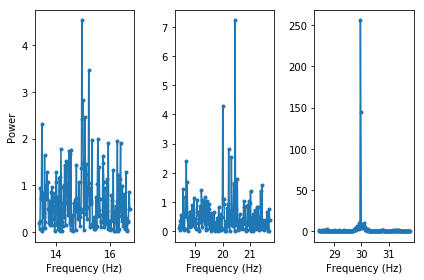

In [8]:
plt.subplot(1,3,1)
plt.plot(fft_freq[800:1000], np.abs(long_fft[800:1000])**2, '.-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

plt.subplot(1,3,2)
plt.plot(fft_freq[1100:1300], np.abs(long_fft[1100:1300])**2, '.-')
plt.xlabel('Frequency (Hz)')

plt.subplot(1,3,3)
plt.plot(fft_freq[1700:1900], np.abs(long_fft[1700:1900])**2, '.-')
plt.xlabel('Frequency (Hz)')

plt.tight_layout()

## Fix artifacts

The artifact that seems to be causing the most trouble is the peak at ~30 Hz. To address this, we will normalize the coefficient of the points in the peak to the average of the X surrounding frequency bins.

In [10]:
short_fft_fixed = np.copy(short_fft)
long_fft_fixed = np.copy(long_fft)

short_fft_fixed[1791:1794] *= np.mean(np.abs(np.concatenate((short_fft[1788:1791], short_fft[1794:1797]))))/np.abs(short_fft[1791:1794])
short_fft_fixed[-1793:-1790] *= np.mean(np.abs(np.concatenate((short_fft[-1796:-1793], short_fft[-1790:-1787]))))/np.abs(short_fft[-1793:-1790])

long_fft_fixed[1791:1794] *= np.mean(np.abs(np.concatenate((long_fft[1788:1791], long_fft[1794:1797]))))/np.abs(long_fft[1791:1794])
long_fft_fixed[-1793:-1790] *= np.mean(np.abs(np.concatenate((long_fft[-1796:-1793], long_fft[-1790:-1787]))))/np.abs(long_fft[-1793:-1790])


### Short hold

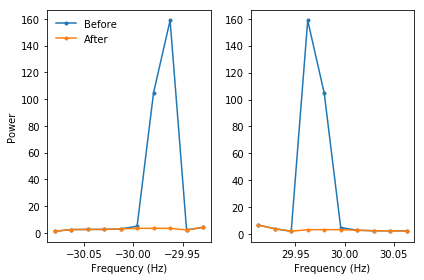

In [11]:
plt.subplot(1,2,1)
plt.plot(fft_freq[-1798:-1788], np.abs(short_fft[-1798:-1788])**2, '.-', label='Before')
plt.plot(fft_freq[-1798:-1788], np.abs(short_fft_fixed[-1798:-1788])**2, '.-', label='After')
plt.legend(frameon=False)
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')

plt.subplot(1,2,2)
plt.plot(fft_freq[1788:1798], np.abs(short_fft[1788:1798])**2, '.-')
plt.plot(fft_freq[1788:1798], np.abs(short_fft_fixed[1788:1798])**2, '.-')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()

### Long hold

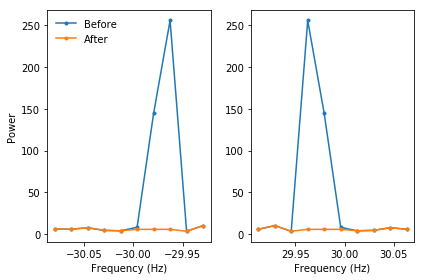

In [12]:
plt.subplot(1,2,1)
plt.plot(fft_freq[-1798:-1788], np.abs(long_fft[-1798:-1788])**2, '.-', label='Before')
plt.plot(fft_freq[-1798:-1788], np.abs(long_fft_fixed[-1798:-1788])**2, '.-', label='After')
plt.legend(frameon=False)
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')

plt.subplot(1,2,2)
plt.plot(fft_freq[1788:1798], np.abs(long_fft[1788:1798])**2, '.-')
plt.plot(fft_freq[1788:1798], np.abs(long_fft_fixed[1788:1798])**2, '.-')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()

## Invert, compare to original

In [13]:
pe_short_new = np.real(np.concatenate((np.array([1]), np.fft.ifft(short_fft_fixed))))
pe_long_new = np.real(np.concatenate((np.array([1]), np.fft.ifft(long_fft_fixed))))

### Short hold

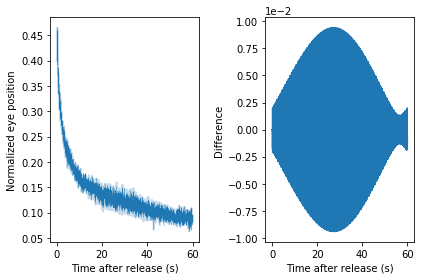

In [14]:
plt.subplot(1,2,1)
plt.plot(trange[1:], pe_short[1:], alpha=0.25, lw=2, solid_capstyle='butt')
plt.plot(trange[1:], pe_short_new[1:], c='C0', lw=0.25, zorder=10, solid_capstyle='butt')
plt.xlabel('Time after release (s)')
plt.ylabel('Normalized eye position')

plt.subplot(1,2,2)
plt.plot(trange, pe_short-pe_short_new)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ylabel('Difference')
plt.xlabel('Time after release (s)')

plt.tight_layout()

### Long hold

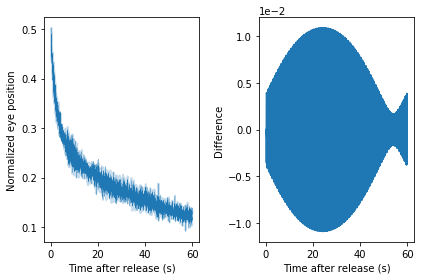

In [15]:
plt.subplot(1,2,1)
plt.plot(trange[1:], pe_long[1:], alpha=0.25, lw=2, solid_capstyle='butt')
plt.plot(trange[1:], pe_long_new[1:], c='C0', lw=0.25, zorder=10, solid_capstyle='butt')
plt.xlabel('Time after release (s)')
plt.ylabel('Normalized eye position')

plt.subplot(1,2,2)
plt.plot(trange, pe_long-pe_long_new)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ylabel('Difference')
plt.xlabel('Time after release (s)')

plt.tight_layout()

# Apply transformation to all fish

In [16]:
# MS-222
for fish_ind in range(len(ms222_traces)):
    trange, pe_short, pe_long = fitting_functions.importDataMS222(data_folder+'raw/MS-222/'+ms222_traces[fish_ind]+'.mat')
    fft_short = np.fft.fft(pe_short[1:])
    fft_long = np.fft.fft(pe_long[1:])
    
    fft_short[1791:1794] *= np.mean(np.abs(np.concatenate((fft_short[1788:1791], fft_short[1794:1797]))))/np.abs(fft_short[1791:1794])
    fft_short[-1793:-1790] *= np.mean(np.abs(np.concatenate((fft_short[-1796:-1793], fft_short[-1790:-1787]))))/np.abs(fft_short[-1793:-1790])

    fft_long[1791:1794] *= np.mean(np.abs(np.concatenate((fft_long[1788:1791], fft_long[1794:1797]))))/np.abs(fft_long[1791:1794])
    fft_long[-1793:-1790] *= np.mean(np.abs(np.concatenate((fft_long[-1796:-1793], fft_long[-1790:-1787]))))/np.abs(fft_long[-1793:-1790])

    pe_short_fixed = np.concatenate((np.array([1]), np.real(np.fft.ifft(fft_short))))
    pe_long_fixed = np.concatenate((np.array([1]), np.real(np.fft.ifft(fft_long))))
    
    sio.savemat(data_folder+'fixed/MS-222/'+ms222_traces[fish_ind]+'.mat',\
                {'eye_pos_10s':pe_short_fixed, 'eye_pos_60s':pe_long_fixed }, appendmat=False) 

# Ketamine
for fish_ind in range(len(ketamine_traces)):
    trange, pe_short, pe_long = fitting_functions.importDataKetamine(data_folder+'raw/Ketamine/'+ketamine_traces[fish_ind]+'.mat')
    fft_short = np.fft.fft(pe_short[1:])
    fft_long = np.fft.fft(pe_long[1:])
    
    fft_short[1791:1794] *= np.mean(np.abs(np.concatenate((fft_short[1788:1791], fft_short[1794:1797]))))/np.abs(fft_short[1791:1794])
    fft_short[-1793:-1790] *= np.mean(np.abs(np.concatenate((fft_short[-1796:-1793], fft_short[-1790:-1787]))))/np.abs(fft_short[-1793:-1790])

    fft_long[1791:1794] *= np.mean(np.abs(np.concatenate((fft_long[1788:1791], fft_long[1794:1797]))))/np.abs(fft_long[1791:1794])
    fft_long[-1793:-1790] *= np.mean(np.abs(np.concatenate((fft_long[-1796:-1793], fft_long[-1790:-1787]))))/np.abs(fft_long[-1793:-1790])

    pe_short_fixed = np.concatenate((np.array([1]), np.real(np.fft.ifft(fft_short))))
    pe_long_fixed = np.concatenate((np.array([1]), np.real(np.fft.ifft(fft_long))))
    
    sio.savemat(data_folder+'fixed/Ketamine/'+ketamine_traces[fish_ind]+'.mat',\
            {'eye_pos_15s':pe_short_fixed, 'eye_pos_90s':pe_long_fixed }, appendmat=False) 